In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import ML libraries
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# display maximum number of rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# load data
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# check if any duplicates in our DataFrame to ensures data quality and integrity
data.duplicated().sum()

1081

-  The dataset contains some duplicate rows, which might be valid due to scenarios like identical transaction amounts, similar PCA-transformed features, or matching timestamps for simultaneous transactions. 
-  However, duplicates can bias machine learning models by overweighting patterns in repeated rows, leading to skewed results.
-  Since machine learning algorithms assume each row represents unique information but duplicates doesn’t add any new information, we will drop these duplicates to ensure a balanced and unbiased dataset for training.

In [10]:
duplicates = data[data.duplicated()]
data = data.drop_duplicates()

In [11]:
data.shape

(283726, 31)

In [12]:
# checking missing values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

-  No Missing values in the Dataset.

In [13]:
# Convert the 'Time' column to hours
data['Hour_of_day'] = (data['Time'] // 3600) % 24

In [14]:
data.drop(columns=['Time'], inplace = True)

In [15]:
# Reorder column names
desired_order = ['Class', 'Amount', 'Hour_of_day'] + [f'V{i}' for i in range(1, 29)]

data = data[desired_order]
data.columns

Index(['Class', 'Amount', 'Hour_of_day', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28'],
      dtype='object')

In [16]:
data.head()

,Class,Amount,Hour_of_day,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0,149.62,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0,2.69,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,0,378.66,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,0,123.50,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0,69.99,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


### EDA

In [17]:
print(data['Class'].value_counts(normalize  = True)*100)

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


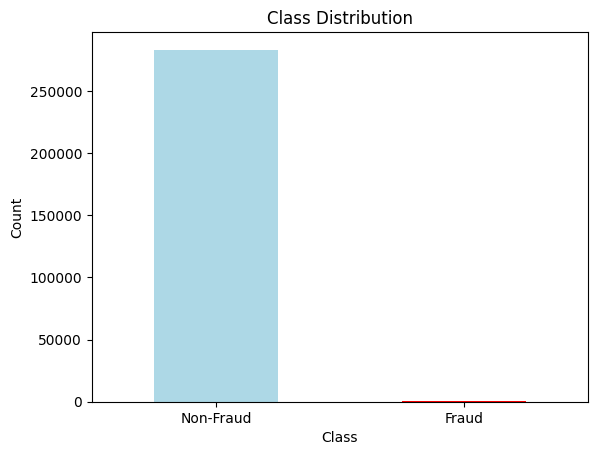

In [18]:
# Plot class distribution
data['Class'].value_counts().plot(kind='bar', title='Class Distribution', color=['lightblue','red'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

-  The dataset is heavily skewed towards non-fraudulent transactions, with fraudulent transactions being significantly underrepresented.
-  Non-fraudulent transactions constitute the majority of the data, representing over 99% of the total.
-  Fraudulent transactions are rare, accounting for less than 1% of the dataset.

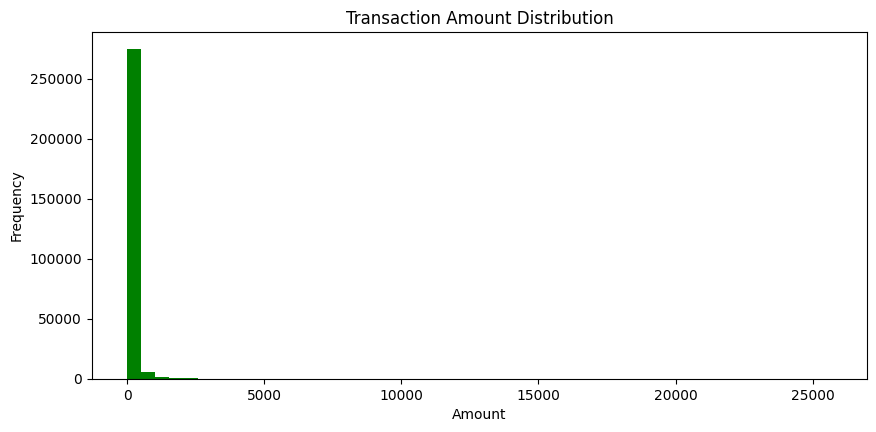

In [19]:
# Distribution for 'Amount'
plt.figure(figsize= [10,4.5])
data['Amount'].plot(kind='hist', bins=50, title='Transaction Amount Distribution', color = 'green')
plt.xlabel('Amount')
plt.show()

-  The majority of transactions are concentrated towards the lower end of the amount range, suggesting that most transactions are relatively small.

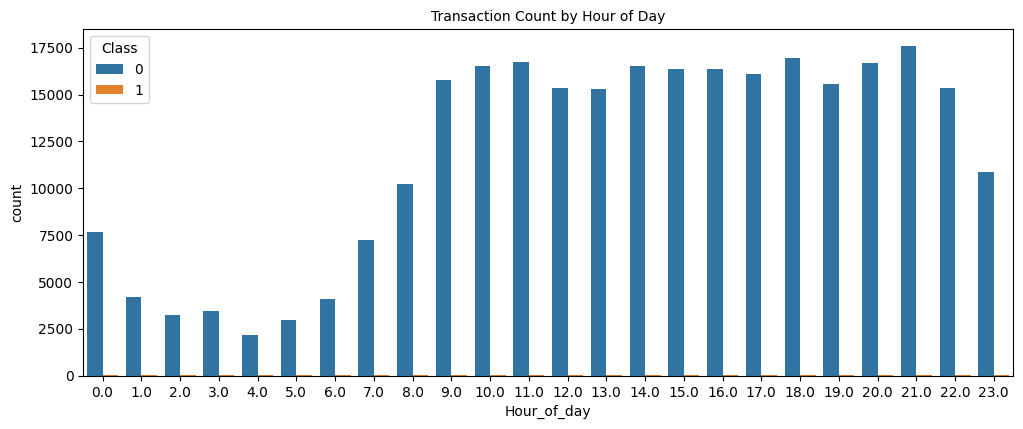

In [20]:
# Plot Hour_of_Day distribution for Fraud and Non-Fraud transactions
plt.figure(figsize=(12, 4.5))
sns.countplot(x='Hour_of_day', hue='Class', data=data)
plt.title('Transaction Count by Hour of Day', fontsize = 10)
plt.show()

-  Most transactions occur between 9 AM and 9 PM, suggesting a strong correlation with business hours.
-  While the limited visibility makes it difficult to discern the exact distribution of fraudulent transactions, it appears they are scattered throughout the day. 

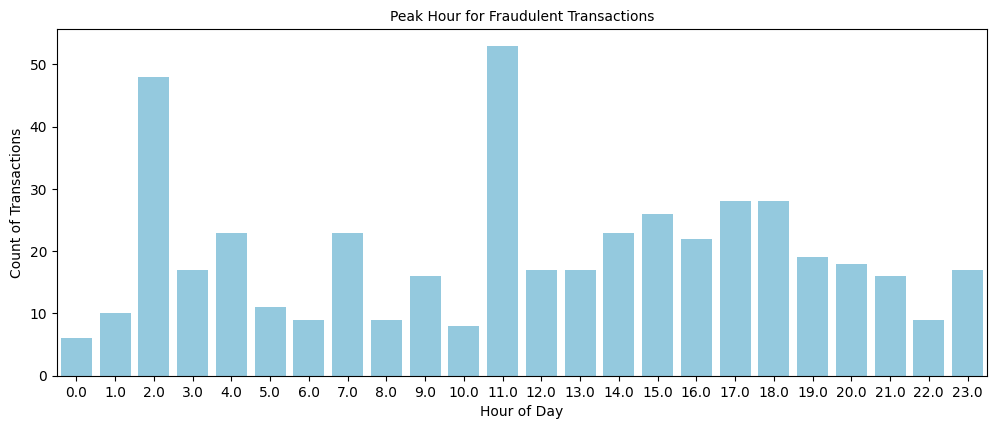

In [21]:
fraud_data = data[data['Class'] == 1]

# Plot Hour_of_day distribution for Fraud transactions
plt.figure(figsize=(12, 4.5))
sns.countplot(x='Hour_of_day', data=fraud_data, color ='skyblue')
plt.title('Peak Hour for Fraudulent Transactions', fontsize = 10)
plt.xlabel('Hour of Day')
plt.ylabel('Count of Transactions')
plt.show()

-  The plot suggests a potential peak in fraudulent transactions around 2 AM and then around 11 AM.
-  Outside of the potential 2 AM peak, fraudulent transactions appear to be distributed relatively evenly throughout the day.

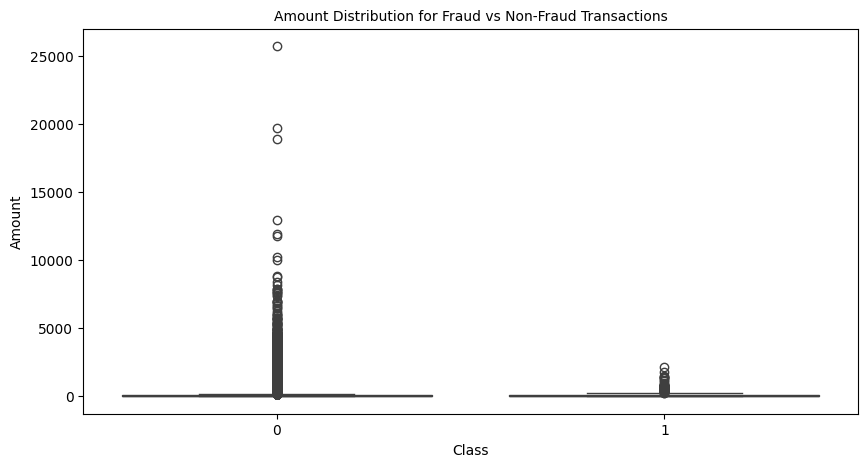

In [22]:
# Visualize distribution of Amount by Class
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Amount Distribution for Fraud vs Non-Fraud Transactions', fontsize = 10)
plt.show()

-  Fraudulent transactions tend to have a more limited range of amounts, typically below 5,000. In contrast, non-fraudulent transactions exhibit a wider range, with a significant portion clustered below 10,000.
-  This suggests that fraudulent transactions might be designed to avoid detection by keeping the amounts relatively low.
-  The plot reveals a few extreme outliers in the non-fraudulent category, indicating unusually large transactions. These outliers might be legitimate, such as large purchases or transfers, but they could also potentially mask fraudulent activity.

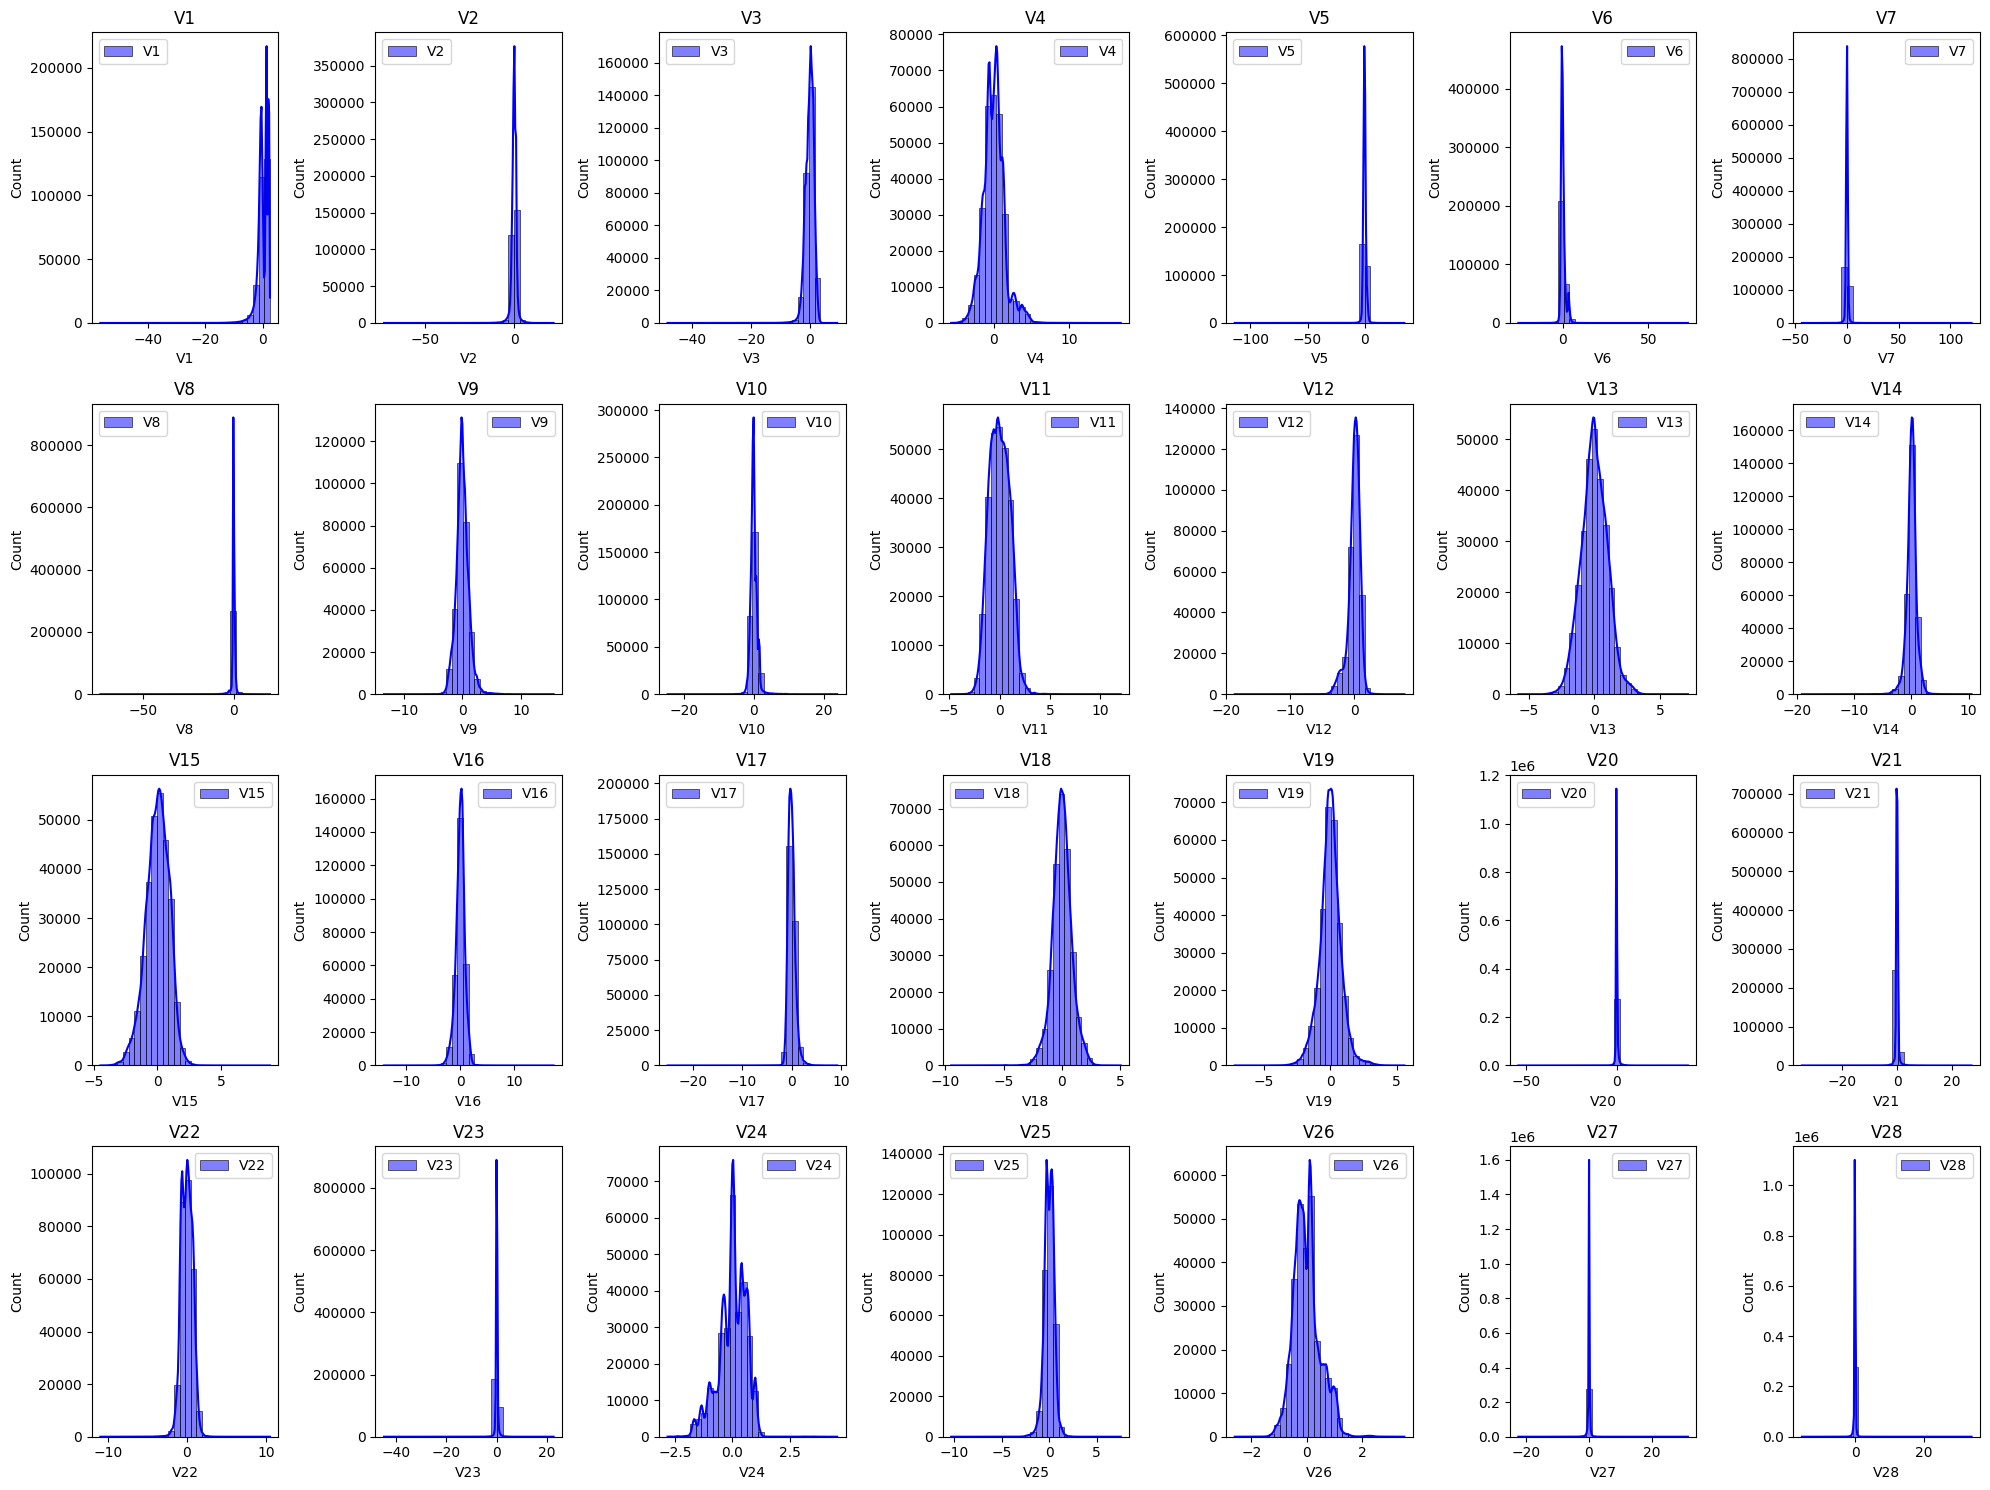

In [23]:
fig, axes = plt.subplots(4, 7, figsize=(20, 15))
axes = axes.flatten()

# Plot histograms for 'V1' to 'V28'
for i in range(28):
    sns.histplot(data[f'V{i+1}'], kde=True, bins=30, color='blue', ax=axes[i], label=f'V{i+1}')
    axes[i].set_title(f'V{i+1}')
    axes[i].legend()

plt.tight_layout() 
plt.show()

-  Features like V28 exhibit extreme negative skewness, while others like V6, V7, and V21 show moderate positive skewness.
-  These could negatively impact the performance of certain machine learning algorithms. Thus we will apply Power Transformation to these features to reduce skewness and make the distribution more Gaussian-like, thereby improving model performance.

In [24]:
# Transform all principal components
cols_to_transform = [f'V{i}' for i in range(1, 29)]
power_trans = PowerTransformer()

data[cols_to_transform] = power_trans.fit_transform(data[cols_to_transform])

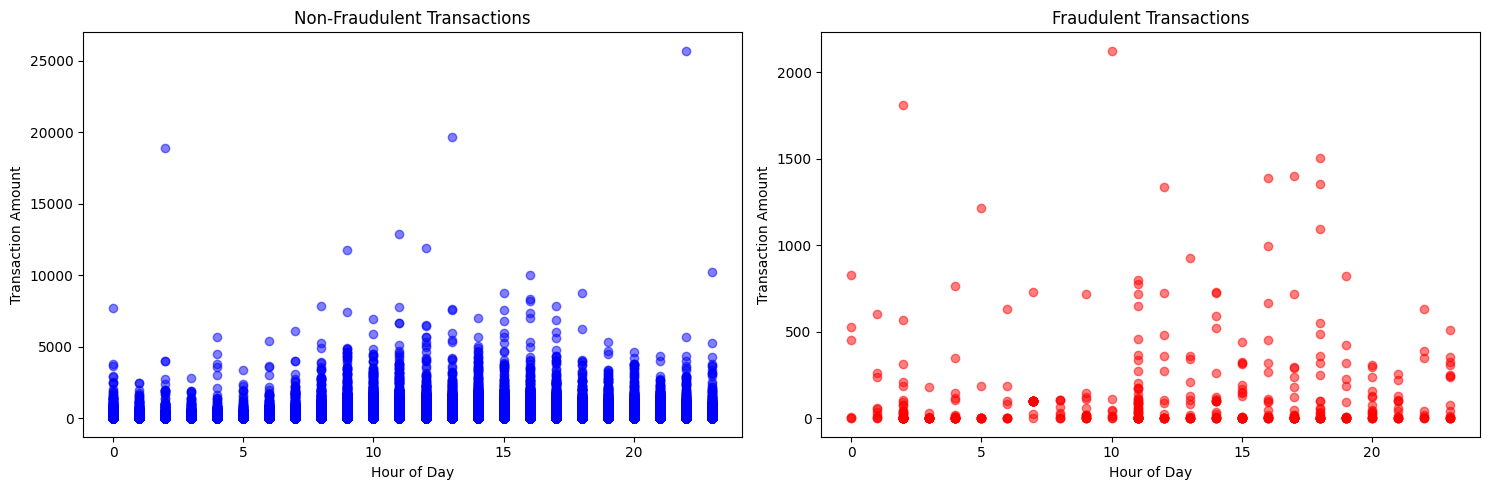

In [25]:
non_fraud_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# for Non-Fraud transactions
axes[0].scatter(non_fraud_data['Hour_of_day'], non_fraud_data['Amount'], alpha=0.5, c='blue')
axes[0].set_title('Non-Fraudulent Transactions')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Transaction Amount')

# for Fraud transactions
axes[1].scatter(fraud_data['Hour_of_day'], fraud_data['Amount'], alpha=0.5, c='red')
axes[1].set_title('Fraudulent Transactions')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

-  Fraudulent transactions appear to occur more frequently during certain periods, such as between 10 AM and 6 PM, with some activity later in the day.
-  The majority of fraudulent transactions have relatively low transaction amounts, mostly below 500. Only a handful of high-value fraudulent transactions occur, with most of them clustered during specific hours.

-  Non-Fraudulent Transactions are distributed across all hours of the day. Transaction amounts vary significantly, with several reaching above 5000, but mostly are below 5000. Higher-value transactions appear to occur sporadically across the day, without a clear time trend, just a little bit similar to Fraudulent ones i.e around 10 AM to 3 PM.

### Model Building

In [26]:
# remove the non-predicting features and the target variable
X = data.drop(['Class'], axis =1)
X.head(3)

,Amount,Hour_of_day,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,149.62,0.0,-0.908517,-0.131109,2.174201,0.986309,-0.257317,0.460075,0.195593,0.022528,0.382316,0.132305,-0.514931,-0.775160,-0.997830,-0.405212,1.711212,-0.601877,0.218822,0.009066,0.504127,0.323745,-0.009113,0.368766,-0.190040,0.014889,0.212398,-0.323989,0.326111,-0.055175
1,2.69,0.0,0.625754,0.094915,-0.033947,0.389851,0.031415,0.046651,-0.063677,0.008792,-0.183999,-0.113185,1.527521,1.301117,0.498009,-0.232233,0.673957,0.492409,-0.174327,-0.239781,-0.169397,-0.093514,-0.302964,-0.885006,0.153295,-0.637695,0.288921,0.353565,-0.038270,0.056557
2,378.66,0.0,-0.907941,-0.873965,1.381479,0.343686,-0.376027,1.321920,0.643991,0.176162,-1.455515,0.240811,0.640955,-0.103666,0.724167,-0.255500,2.873788,-2.823940,1.387765,-0.166343,-2.839986,0.681493,0.360668,1.070494,1.502750,-1.133754,-0.653256,-0.209921,-0.155875,-0.176605


In [27]:
# storing the target vriable in y
y = data['Class']
y.head(4)

0    0
1    0
2    0
3    0
Name: Class, dtype: int64

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3 , random_state=42, stratify=y)

In [29]:
# check shape and size
print(X_train.shape)
print(X_test.shape)

(198608, 30)
(85118, 30)


-  Due to the significant class imbalance observed in the dataset, where 99.83% of transactions are non-fraudulent and only 0.17% are fraudulent, the model may become biased toward predicting the majority class. This imbalance can hinder the model's ability to accurately detect fraud. To address this, we will use the SMOTE (Synthetic Minority Over-sampling Technique) method, on the training set, to oversample the minority class, thus creating synthetic samples of fraudulent transactions to balance the dataset and improve the model's ability to detect fraud more effectively.

In [30]:
#Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [31]:
y_train.value_counts(normalize=True) * 100

Class
0    50.0
1    50.0
Name: proportion, dtype: float64

In [32]:
scaler = StandardScaler()

# Apply scaler() to all the columns except the binary ones and 'dummy' variables, scaling ensures they contribute equally to the model
X_train[['Amount', 'Hour_of_day']] = scaler.fit_transform(X_train[['Amount', 'Hour_of_day']])

In [33]:
# Create a logistic regression model
logreg = LogisticRegression(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1],  
    'solver': ['liblinear'],  
    'max_iter': [100, 200]}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.9639292508359305


In [34]:
# Train model using above parameters
final_model = LogisticRegression(
    class_weight='balanced',
    penalty=best_params['penalty'],
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    random_state=42
)

# Fit the model on the training data
result = final_model.fit(X_train, y_train)

In [35]:
# Display intercept and coefficients
print("Intercept:", result.intercept_)

feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': result.coef_[0]})

print(feature_coefficients.sort_values(by='Coefficient', ascending=False))

Intercept: [-4.64361261]
        Feature  Coefficient
5            V4     2.000239
12          V11     1.117516
25          V24     0.330634
22          V21     0.302918
23          V22     0.288019
1   Hour_of_day     0.265716
21          V20     0.118666
28          V27     0.107636
29          V28     0.096713
8            V7     0.095748
2            V1     0.047977
7            V6    -0.006658
14          V13    -0.015815
20          V19    -0.058608
24          V23    -0.096202
27          V26    -0.224115
26          V25    -0.256286
6            V5    -0.286477
19          V18    -0.323134
4            V3    -0.455168
16          V15    -0.518958
10           V9    -0.694866
17          V16    -0.718343
18          V17    -0.866914
3            V2    -0.905860
0        Amount    -0.911458
9            V8    -0.998727
11          V10    -1.377736
15          V14    -1.606562
13          V12    -1.770939


-  From the logistic regression coefficients, V4 and V11 emerge as strong indicators of fraud with high positive influence, while V12 and V14 have significant negative impact. 
-  Features with larger absolute coefficients, such as V4, V11, and V12, are most impactful, highlighting their importance for fraud detection

In [36]:
# Predictions on the training data
y_train_pred = result.predict(X_train)

In [37]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
y_train_proba = result.predict_proba(X_train)[:, 1]

In [39]:
y_train_proba

array([0.00285187, 0.00381638, 0.01388534, ..., 1.        , 0.99999999,
       0.99999973])

In [40]:
y_train_pred_final = pd.DataFrame({'Class': y_train.values, 'Class_prob': y_train_proba})

In [41]:
y_train_pred_final.head(5)

,Class,Class_prob
0,0,0.002852
1,0,0.003816
2,0,0.013885
3,0,0.001159
4,0,0.039468


In [42]:
# Calculate metrics
print("Training Performance Metrics:")
print(classification_report(y_train, y_train_pred))

# Print accuracy 
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# F1 score
print(f"F1-Score: {f1_score(y_train, y_train_pred) :.4f}")

Training Performance Metrics:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    198277
           1       0.98      0.95      0.96    198277

    accuracy                           0.96    396554
   macro avg       0.96      0.96      0.96    396554
weighted avg       0.96      0.96      0.96    396554

Training Accuracy: 0.9640
F1-Score: 0.9634


In [43]:
# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[194090   4187]
 [ 10096 188181]]


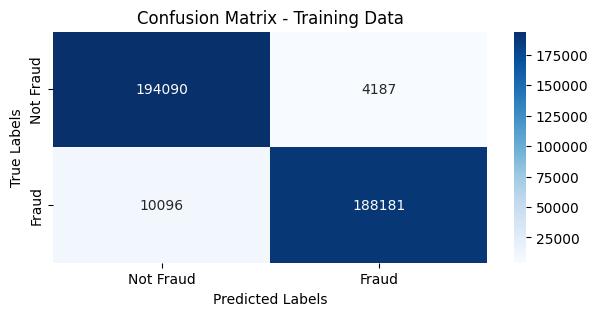

In [44]:
plt.figure(figsize=(7,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

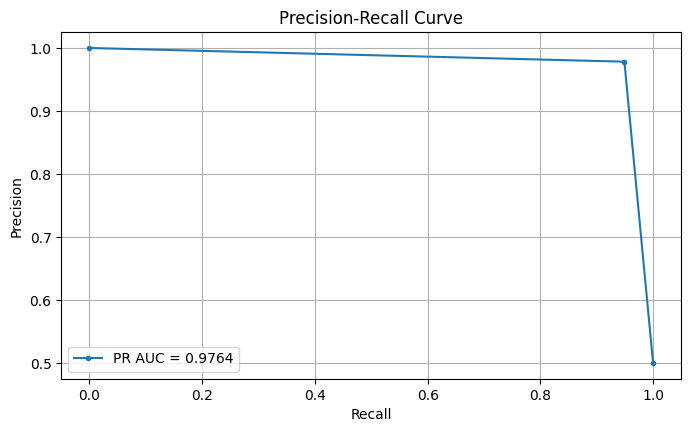

In [45]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_pred)

# Calculate AUC for Precision-Recall Curve
pr_auc = auc(recall, precision)

# Plot
plt.figure(figsize=(8, 4.5))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

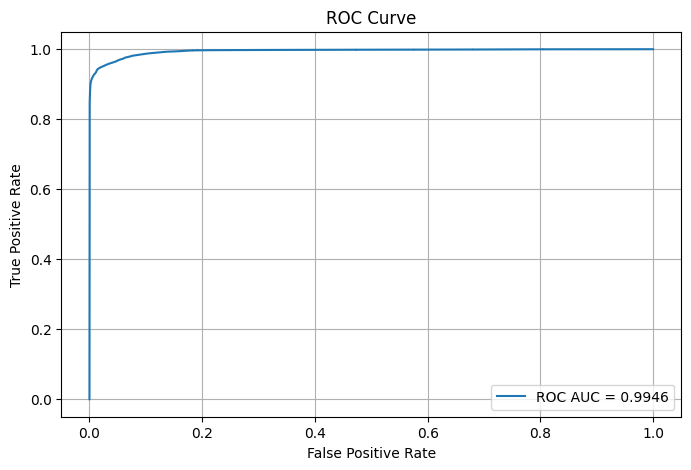

In [46]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_train, y_train_proba)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_train, y_train_proba)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### Predict on Test set

In [47]:
# Apply scaler() to all the columns except the binary ones and 'dummy' variables, scaling ensures they contribute equally to the model
X_test[['Amount','Hour_of_day' ]] = scaler.transform(X_test[['Amount','Hour_of_day']])

In [48]:
# Predictions on the test data
y_test_pred = result.predict(X_test)

In [49]:
# Predicted probabilities
y_test_proba = result.predict_proba(X_test)[:, 1]

In [50]:
# Calculate metrics
print("Training Performance Metrics:")
print(classification_report(y_test, y_test_pred))

# Print accuracy 
train_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# F1 score
print(f"F1-Score: {f1_score(y_test, y_test_pred) :.4f}")

Training Performance Metrics:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.07      0.89      0.12       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.56     85118
weighted avg       1.00      0.98      0.99     85118

Training Accuracy: 0.9788
F1-Score: 0.1226


In [51]:
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

# Calculate the Precision-Recall AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Precision-Recall AUC: 0.47667131950330455


### Model Building Using Random Forest 

In [52]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  
    random_state=42,   
    class_weight='balanced',  
    max_depth=10)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = rf_model.predict(X_train)
y_train_proba = rf_model.predict_proba(X_train)[:, 1]

In [53]:
# Training Metrics
print("Training Performance Metrics:")
print(classification_report(y_train, y_train_pred))

# Training Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# F1 score
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training F1-Score: {train_f1:.4f}")

Training Performance Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    198277
           1       1.00      0.99      0.99    198277

    accuracy                           0.99    396554
   macro avg       0.99      0.99      0.99    396554
weighted avg       0.99      0.99      0.99    396554

Training Accuracy: 0.9927
Training F1-Score: 0.9926


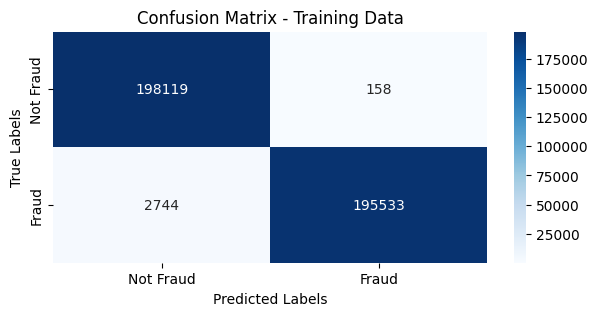

In [54]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(7, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

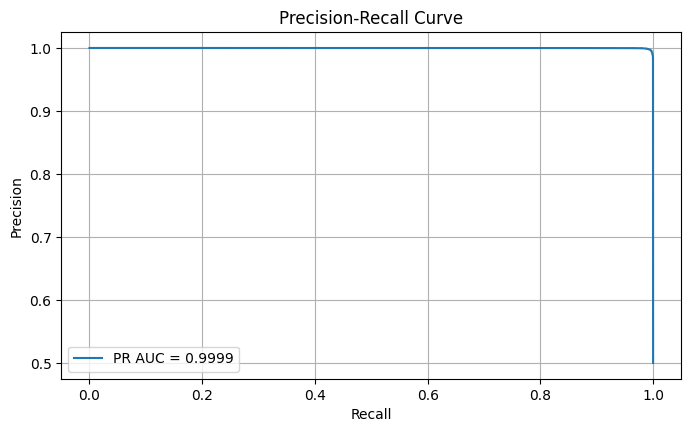

In [55]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_train_proba)
pr_auc_train = auc(recall, precision)
plt.figure(figsize=(8, 4.5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc_train:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

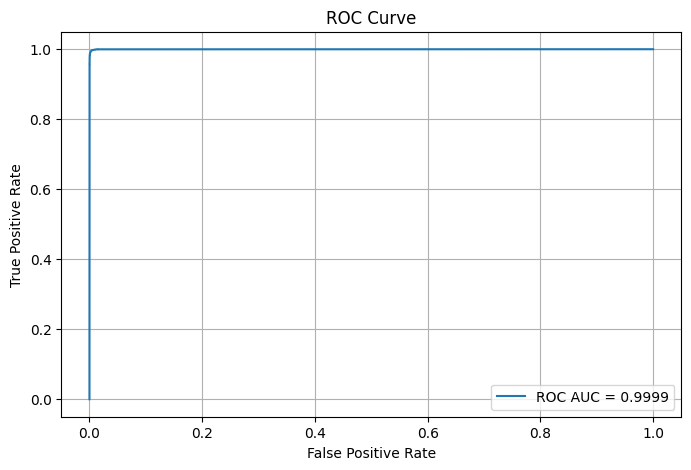

In [56]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = roc_auc_score(y_train, y_train_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_train:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### Prediction on TEST SET

In [57]:
# Predictions on the test set
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

In [58]:
# Test Metrics
print("Test Performance Metrics:")
print(classification_report(y_test, y_test_pred))

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Test F1-Score
test_f1 = f1_score(y_test, y_test_pred)
print(f"Test F1-Score: {test_f1:.4f}")

Test Performance Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.60      0.84      0.70       142

    accuracy                           1.00     85118
   macro avg       0.80      0.92      0.85     85118
weighted avg       1.00      1.00      1.00     85118

Test Accuracy: 0.9988
Test F1-Score: 0.6979


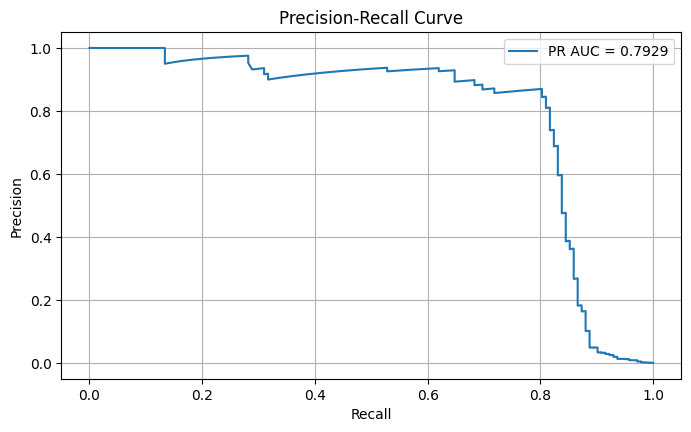

In [59]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc_test = auc(recall, precision)
plt.figure(figsize=(8, 4.5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc_test:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Find the threshold that gives a better balance between precision and recall
optimal_threshold = thresholds[np.argmax(precision + recall)]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.7277129625706362


In [61]:
threshold = 0.72

# Make predictions based on the threshold
y_test_pred_threshold = (y_test_proba >= threshold).astype(int)

result_df = pd.DataFrame({
    'Class': y_test,
    'Class_Probability': y_test_proba,
    'Class_Prediction': y_test_pred_threshold})

result_df.head()

,Class,Class_Probability,Class_Prediction
139330,0,0.021913,0
86361,0,0.010948,0
94117,0,0.006461,0
123803,0,0.024194,0
126884,0,0.066720,0


### Model Summary:
`Logistic Regression`
-  Training Accuracy: 96.40%, with a strong performance on the non-fraud class (precision 0.95, recall 0.98).
-  Test Performance: 98.00% accuracy, but low precision (0.07) for fraud detection and a poor F1-Score of 0.12, indicating the model struggled to identify fraudulent transactions.
-  Low PR AUC (0.4767) highlighted poor precision-recall performance for fraud detection.
-  Logistic Regression performed well overall but struggled with class imbalance, particularly in fraud detection.

`Random Forest`
-  Training Accuracy: 99.27%, with near-perfect precision (1.00) and recall (0.99) for fraud detection.
-  Test Performance: 99.88% accuracy, with a much higher F1-Score of 0.70 and improved fraud detection compared to Logistic Regression.
-  PR AUC on test set: 0.7929, significantly better than logistic regression.
-  Random Forest handled class imbalance effectively, providing better precision-recall performance and higher accuracy for fraud detection.